# Hellings-Downs curve


The [Hellings-Downs curve](https://arxiv.org/abs/2208.07230) is used for the detection of the stochastic GW background.

What does _our_ HD-equivalent curve look like using the state-space model and frequencies?

---

### Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

### Define some functions 

Now to start, lets make a function that creates some synthetic data for a particular strain, measurement noise and noise seed AND a function that gets a likelihood value given that data 

In [13]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 



#Function to create synthetic data
def create_synthetic_data(h,process_noise,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=process_noise,σm=measurement_noise,seed=seed)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return data.f_measured, PTA.q,PTA.Npsr



### Create some data

In [60]:
h = 1e-3 #strong signal, zero noise
measurement_noise = 0.0
process_noise = 0.0
seed=1236
f_measured,q,Npsr = create_synthetic_data(h,process_noise,measurement_noise,seed)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1236


chi vals are =  [2.20508423 3.73837182 4.64342782 3.84454169 2.03147765 2.1615264
 2.7393055  0.29304713 0.52094514 2.6468707  0.75625183 2.69753421
 4.72535501 1.80480547 1.22838701 1.52531055 0.95286369 5.88509644
 3.21021583 0.04719118 5.83980336 2.18004167 3.37310913 4.83324786
 5.11353816 2.16383243 4.41393604 2.9784791  2.82463386 4.82152681
 6.10798125 5.59964568 1.81245195 4.24446491 5.69068483 5.94022957
 4.96810897 3.3210893  5.35316912 4.61872321 2.78637006 0.43819632
 3.62569269 3.79912049 5.5055721  2.39926347 0.43862898]


INFO:root:You are including the PSR terms in your synthetic data generation


### Correlate it 

In [61]:
import itertools
indexes = list(itertools.combinations(range(Npsr), 2))

In [62]:
import sys 
from scipy.stats import pearsonr

outputs = np.zeros((len(indexes),2))
print("Getting the correlations between ", len(indexes), " pairs")
for i, (a,b) in enumerate(indexes):

    data_a = f_measured[:,a]
    data_b = f_measured[:,b]
    correlation = pearsonr(data_a, data_b).statistic 

    qa = q[a,:]
    qb = q[b,:]
    cos_angle = np.dot(qa,qb) / (np.linalg.norm(qa) * np.linalg.norm(qb))
    
    outputs[i,0] = np.arccos(cos_angle)
    outputs[i,1] = correlation




Getting the correlations between  1081  pairs


In [63]:
#Sort it by angle
x = outputs[:,0]
y = outputs[:,1]

idx = np.argsort(x)

x_sorted = x[idx]
y_sorted = y[idx]

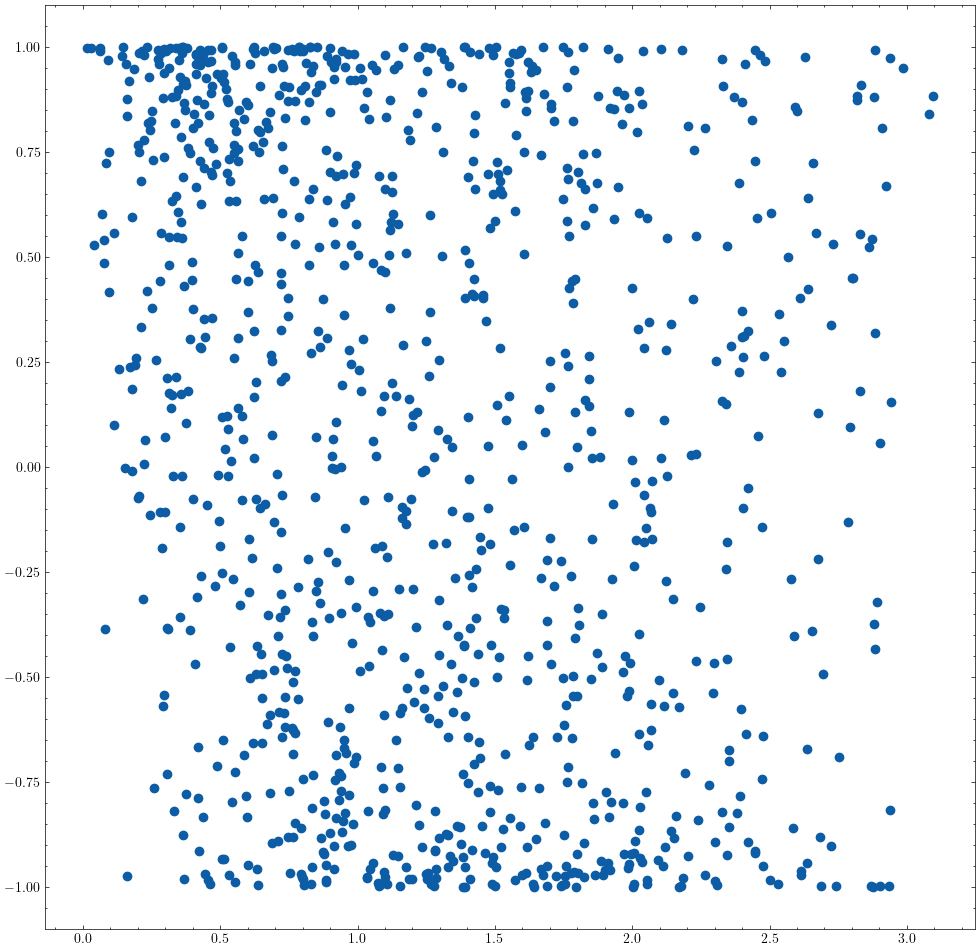

In [64]:
#Plot it
import matplotlib.pyplot as plt 
import scienceplots 

plt.style.use('science')


h,w = 12,12
rows = 1
cols = 1
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w),sharex=True)
ax.scatter(x_sorted,y_sorted)


